## 7324 Assignment A5 : Logistic Regression vs KMeans
##### Name: Thang Nguyen
##### SMU ID: 48689334

## Imports

In [1]:
# The Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
# Data Wrangling Tool
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Foundational libraries
import pandas as pd
import numpy as np

## Utility Functions

In [2]:
def display_confusion_matrix(title: str, background: str, y_test: list, y_predict: list, classes: list):
    matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict, labels=classes), display_labels=classes)
    matrix.plot()
    plt.xlabel('Predicted Label', color=background)
    plt.ylabel('True Label', color=background)
    plt.title(title)
    plt.show()

def display_kmeans_elbow(X: any, title: str):
    SSE = []
    for cluster in range(1, 10):
        km = KMeans(n_clusters=cluster, init='k-means++', n_init=10)
        km.fit(X)
        SSE.append(km.inertia_)

    # displaying elbow
    frame = pd.DataFrame({'Cluster': range(1, 10), 'SSE': SSE})
    plt.figure(figsize=(12,6))
    plt.plot(frame['Cluster'], frame['SSE'], marker='o')
    plt.xlabel('Num of Clusters')
    plt.ylabel('Inertia')
    plt.title(title)
    plt.show()

## Loading Dataset

In [3]:
diabet_df = pd.read_csv("../data/diabetes.csv")
# check for nulls 
diabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Cleaning Dataset

In [4]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Seems like zeros may be an issue

In [5]:
# for col in diabet_df:
#     print(f'{col} min: {diabet_df[col].min()}')

### Dealing With Zeros
#### Zeros may skew the features in a certain direction
#### We apply the mean of the column for any zero

##### Set: Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [6]:
# for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
#     diabet_df[col] = diabet_df[col].replace(to_replace = 0, value = diabet_df[col].mean())

In [7]:
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Analysis

### Splitting and Scaling

In [8]:
# separate features from target
features = diabet_df.drop('Outcome', axis=1)
target = diabet_df['Outcome']

In [9]:
lgr_X = features
lgr_y = target

# split data into training and test sets
lgr_X_train, lgr_X_test, lgr_y_train, lgr_y_test = train_test_split(lgr_X.values, lgr_y.values, random_state = 0, train_size = 0.8)

## All Features: Logistic Regression

In [10]:
lgr_all = LogisticRegression(random_state=0, solver="newton-cg")

In [11]:
lgr_all.fit(lgr_X_train, lgr_y_train)
lgr_all_y_predict = lgr_all.predict(lgr_X_test)

In [12]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(lgr_y_test, lgr_all_y_predict))
print(classification_report(lgr_y_test, lgr_all_y_predict))
print(confusion_matrix(lgr_y_test, lgr_all_y_predict))

0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]


##### Confusion Matrix

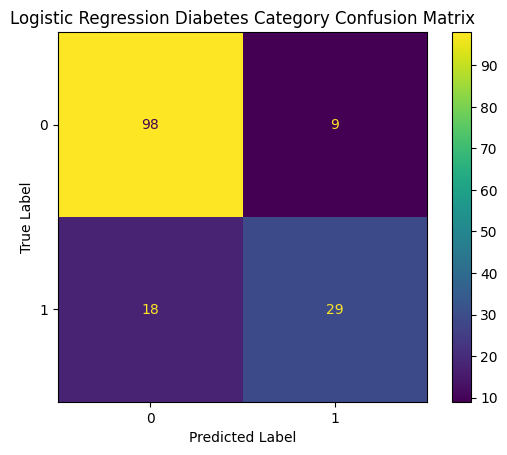

In [13]:
display_confusion_matrix('Logistic Regression Diabetes Category Confusion Matrix', 'black', lgr_y_test, lgr_all_y_predict, lgr_all.classes_)

#### All Features w/Scaling: Logistic Regression

In [14]:
# scale features
scaler = StandardScaler()
lgr_X_train_scaled = scaler.fit_transform(lgr_X_train)
lgr_X_test_scaled = scaler.fit_transform(lgr_X_test)

In [15]:
lgr_all_scaled = LogisticRegression(random_state=0, solver="newton-cg")

In [16]:
lgr_all_scaled.fit(lgr_X_train_scaled, lgr_y_train)
lgr_all_scaled_y_predict = lgr_all.predict(lgr_X_test_scaled)

In [17]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(lgr_y_test, lgr_all_scaled_y_predict))
print(classification_report(lgr_y_test, lgr_all_scaled_y_predict, zero_division=True))
print(confusion_matrix(lgr_y_test, lgr_all_scaled_y_predict))

0.6948051948051948
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       1.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.85      0.50      0.41       154
weighted avg       0.79      0.69      0.57       154

[[107   0]
 [ 47   0]]


##### Confusion Matrix

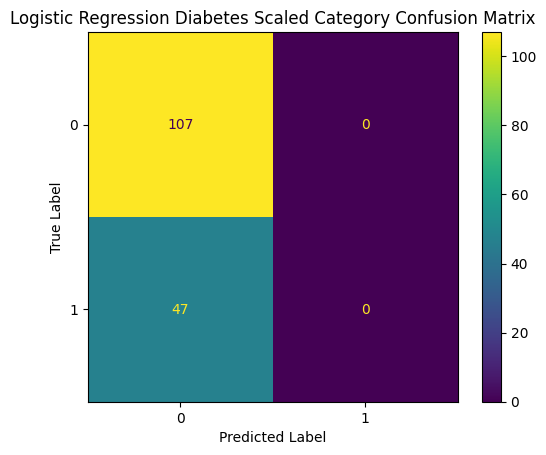

In [18]:
display_confusion_matrix('Logistic Regression Diabetes Scaled Category Confusion Matrix', 'black', lgr_y_test, lgr_all_scaled_y_predict, lgr_all_scaled.classes_)

## Some Features Removed: Logistic Regression

### Removing SkinThickness, BloodPressure, Age, Outcome

In [19]:
lgr_feats_removed_X = diabet_df.drop(['SkinThickness', 'BloodPressure', 'Age', 'Outcome'], axis=1)
lgr_feats_removed_y = diabet_df['Outcome']

In [20]:
lgr_X_train, lgr_X_test, lgr_y_train, lgr_y_test = train_test_split(lgr_feats_removed_X.values, lgr_feats_removed_y.values, random_state = 0, train_size = 0.8)

In [21]:
lgr_feats_removed = LogisticRegression(random_state=0, solver="newton-cg")

In [22]:
lgr_feats_removed.fit(lgr_X_train, lgr_y_train)
lgr_feats_removed_y_predict = lgr_feats_removed.predict(lgr_X_test)

In [23]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(lgr_y_test, lgr_feats_removed_y_predict))
print(classification_report(lgr_y_test, lgr_feats_removed_y_predict))
print(confusion_matrix(lgr_y_test, lgr_feats_removed_y_predict))

0.8051948051948052
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

[[96 11]
 [19 28]]


##### Confusion Matrix

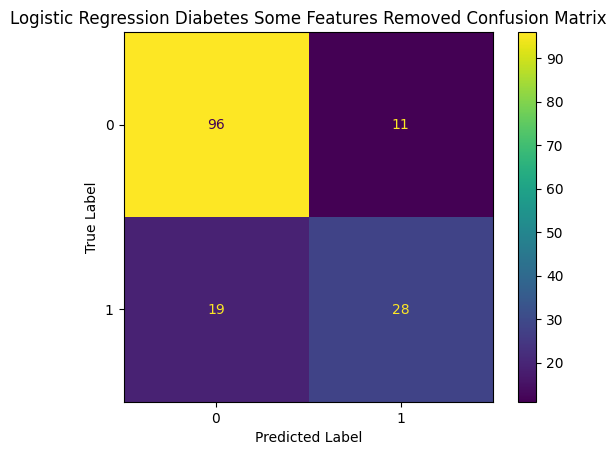

In [24]:
display_confusion_matrix('Logistic Regression Diabetes Some Features Removed Confusion Matrix', 'black', lgr_y_test, lgr_feats_removed_y_predict, lgr_feats_removed.classes_)

## Some Features Removed Scaled: Logistic Regression

In [25]:
# scale features
scaler = StandardScaler()
lgr_feats_removed_X_train_scaled = scaler.fit_transform(lgr_X_train)
lgr_feats_removed_X_test_scaled = scaler.fit_transform(lgr_X_test)    

In [26]:
lgr_feats_removed_scaled = LogisticRegression(random_state=0, solver="newton-cg")

In [27]:
lgr_feats_removed_scaled.fit(lgr_feats_removed_X_train_scaled, lgr_y_train)
lgr_feats_removed_scaled_y_predict = lgr_feats_removed_scaled.predict(lgr_feats_removed_X_test_scaled)

In [28]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(lgr_y_test, lgr_feats_removed_scaled_y_predict))
print(classification_report(lgr_y_test, lgr_feats_removed_scaled_y_predict))
print(confusion_matrix(lgr_y_test, lgr_feats_removed_scaled_y_predict))

0.8246753246753247
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.66      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

[[96 11]
 [16 31]]


##### Confusion Matrix

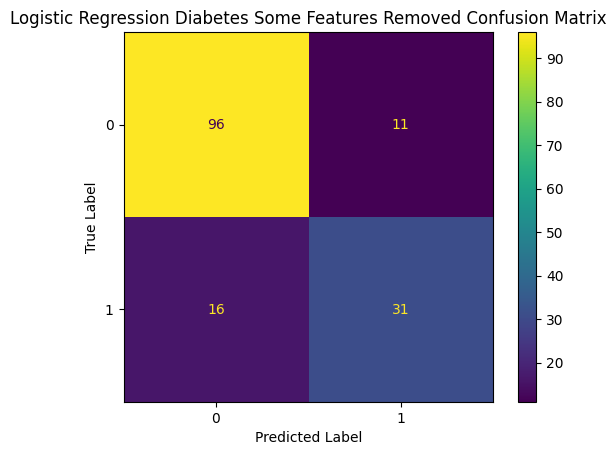

In [29]:
display_confusion_matrix('Logistic Regression Diabetes Some Features Removed Confusion Matrix', 
                         'black', lgr_y_test, lgr_feats_removed_scaled_y_predict, lgr_feats_removed_scaled.classes_)

## All Features: K-Means

In [30]:
km_X = features
km_y = target

# split data into training and test sets
km_X_train, km_X_test, km_y_train, km_y_test = train_test_split(km_X.values, km_y.values, random_state = 0, train_size = 0.8)

### Finding the Elbow

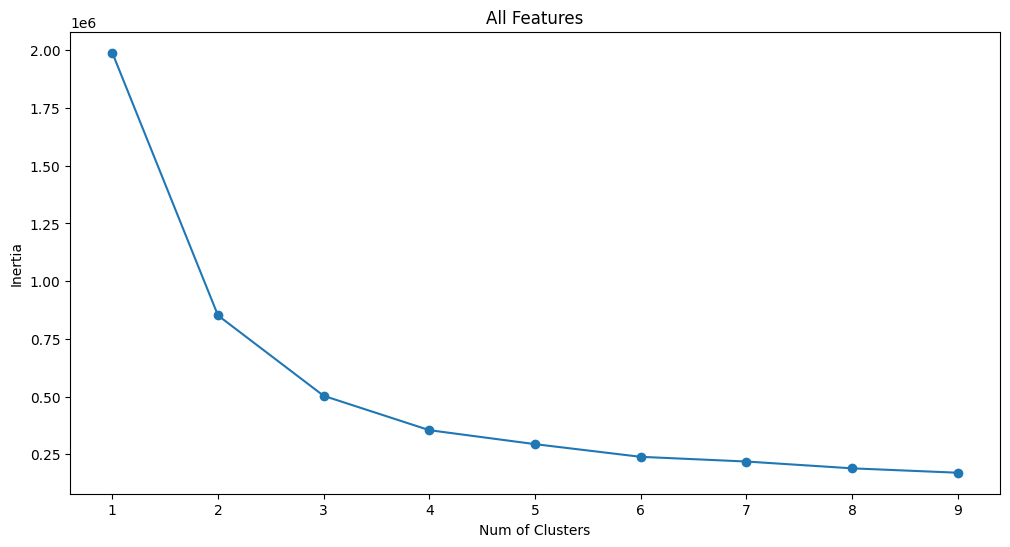

In [31]:
display_kmeans_elbow(km_X_test, 'All Features')

In [32]:
km_all = KMeans(random_state = 0, n_init = 10, n_clusters = 2)

In [33]:
km_all.fit(km_X_train, km_y_train)
km_all_y_predict = km_all.predict(km_X_test)

In [34]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(km_y_test, km_all_y_predict))
print(classification_report(km_y_test, km_all_y_predict, zero_division = True))
print(confusion_matrix(km_y_test, km_all_y_predict))

0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       107
           1       0.54      0.32      0.40        47

    accuracy                           0.71       154
   macro avg       0.64      0.60      0.60       154
weighted avg       0.68      0.71      0.68       154

[[94 13]
 [32 15]]


## All Features Scaled: K-Means

In [35]:
# scale features
scaler = StandardScaler()
km_all_X_train_scaled = scaler.fit_transform(km_X_train)
km_all_X_test_scaled = scaler.fit_transform(km_X_test)    

### Finding the Elbow

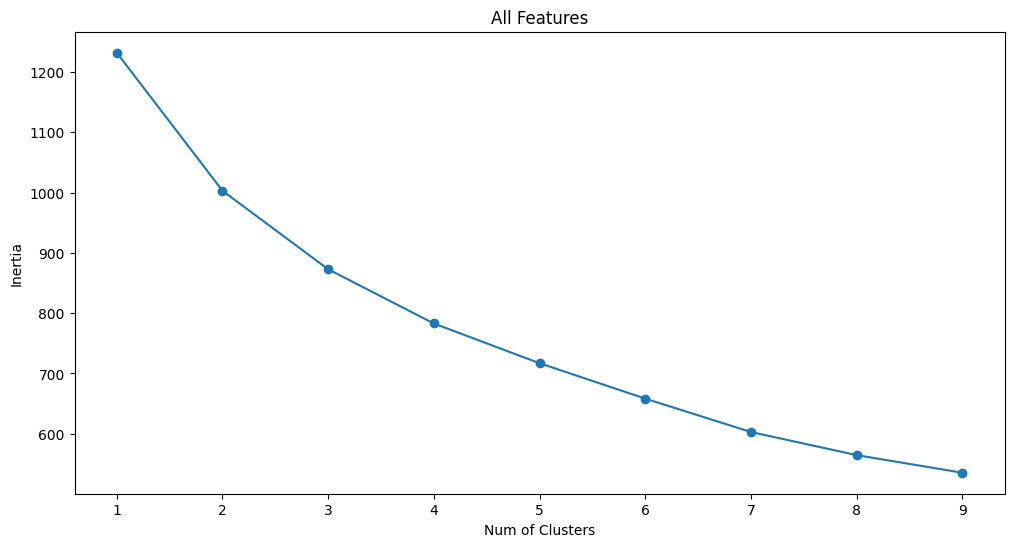

In [36]:
display_kmeans_elbow(km_all_X_test_scaled, 'All Features')

In [37]:
km_all_scaled = KMeans(random_state = 0, n_init = 10, n_clusters = 1)

In [38]:
km_all_scaled.fit(km_all_X_train_scaled, km_y_train)
km_all_scaled_y_predict = km_all_scaled.predict(km_all_X_test_scaled)

In [39]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(km_y_test, km_all_scaled_y_predict))
print(classification_report(km_y_test, km_all_scaled_y_predict, zero_division = True))
print(confusion_matrix(km_y_test, km_all_scaled_y_predict))

0.6948051948051948
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       1.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.85      0.50      0.41       154
weighted avg       0.79      0.69      0.57       154

[[107   0]
 [ 47   0]]


## Some Features Removed: K-Means

### Removing SkinThickness, BloodPressure, Age, Outcome

In [40]:
km_feats_removed_X = diabet_df.drop(['Outcome'], axis=1)
km_feats_removed_y = diabet_df['Outcome']

In [41]:
# split data into training and test sets
km_X_train, km_X_test, km_y_train, km_y_test = train_test_split(km_feats_removed_X.values, km_feats_removed_y.values, random_state = 0, train_size = 0.8)

### Finding the Elbow

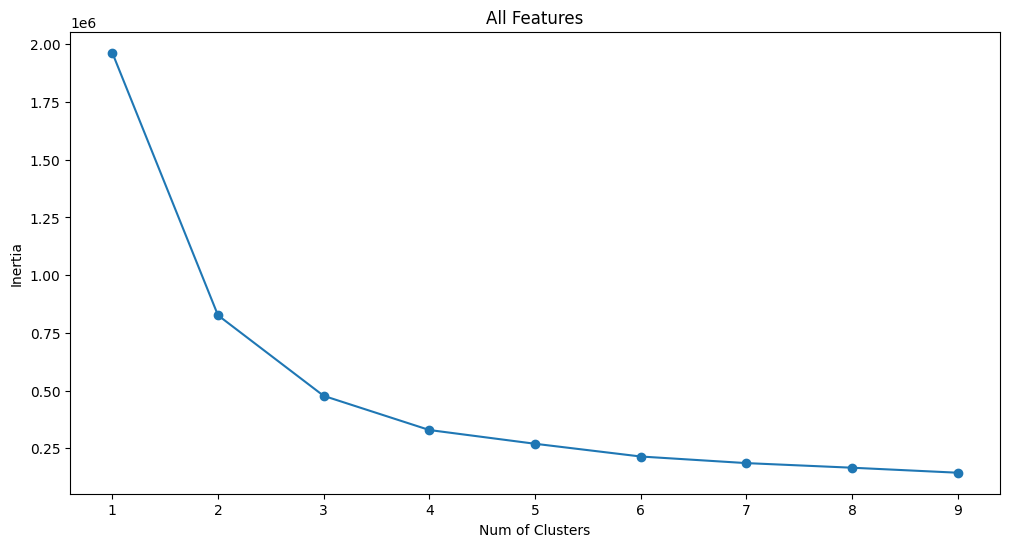

In [42]:
display_kmeans_elbow(km_X_test, 'All Features')

In [46]:
km_feats_removed = KMeans(random_state = 0, n_init = 10, n_clusters = 2)

In [47]:
km_feats_removed.fit(km_X_train, km_y_train)
km_feats_removed_y_predict = km_feats_removed.predict(km_X_test)

In [48]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(km_y_test, km_feats_removed_y_predict))
print(classification_report(km_y_test, km_feats_removed_y_predict, zero_division = True))
print(confusion_matrix(km_y_test, km_feats_removed_y_predict))

0.7142857142857143
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       107
           1       0.56      0.32      0.41        47

    accuracy                           0.71       154
   macro avg       0.65      0.60      0.61       154
weighted avg       0.69      0.71      0.69       154

[[95 12]
 [32 15]]
